In [59]:
import json
import re
import time

from linkify_it import LinkifyIt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys
from tqdm import tqdm
import requests
import xmltodict

%reload_ext autoreload
%autoreload 2
sys.path.append('../scripts')
import pbmd_tools as tools

In [13]:
pip install linkify-it-py

  Using cached linkify_it_py-2.0.2-py3-none-any.whl (19 kB)
  Using cached uc_micro_py-1.0.2-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pbmd.read_tokens("../.env")
GITHUB_TOKEN = os.environ.get("GITHUB_TOKEN")
PUBMED_TOKEN = os.environ.get("PUBMED_TOKEN")

In [15]:
linkify = (
    LinkifyIt()
    .set({"fuzzy_email": False}) 
)

In [28]:
with_http = 0
without_http = 0
github_occur = 0
files = [file for file in os.listdir("../data/xml/") if file.endswith('xml')]

links_stat = {}

for file in files:
    with open(f"../data/xml/{file}", "r") as f:
        try:
            summary = xmltodict.parse(f.read())
            abstract = pbmd.get_abstract_from_summary(summary, "../data/log_files/status_all_links.txt")
        except:
            abstract = None
            
        if abstract != None:

            if linkify.test(abstract):
                if 'github.com' in abstract:
                    github_occur += abstract.count('github.com')
                for match in linkify.match(abstract):
                    link = match.raw
                    try:
                        key = link.split('/')[2]
                    except:
                        try:
                            key = link.split('/')[0]
                        except:
                            key = link
                    if key in links_stat:
                        links_stat[key] += 1
                    else:
                        links_stat[key] = 1

In [36]:
links_stat

{'www.combio.pl': 3,
 'doi.org': 6714,
 'github.com': 10845,
 'LUCAList.jsp': 1,
 'ClinicalTrials.gov': 3873,
 'clinicaltrials.gov': 6629,
 'www.cell.com': 12,
 'docs.python.org': 1,
 'www.ncbi.nlm.nih.gov': 755,
 'imagej.nih.gov': 5,
 'www.stata.com': 13,
 'graphicsprinciples.github.io': 2,
 'cancerres.aacrjournals.org': 252,
 'server.wei-group.net': 5,
 'forestry.fafu.edu.cn': 2,
 'cris.nih.go.kr': 181,
 'www.elsevier.com': 1547,
 'folk.uio.no': 10,
 'uio.no': 1,
 'www.clinicaltrials.gov': 4510,
 'ngdc.cncb.ac.cn': 23,
 'www.isrctn.com': 651,
 'webservices.cs.uni-tuebingen.de': 3,
 'www.cogsys.cs.uni-tuebingen.de': 7,
 'ffas.burnham.org': 2,
 'www.moh': 1,
 'publications.aspx?id=24048': 1,
 'www.biochem.mpg.de': 2,
 'bitbucket.org': 329,
 'www.asn-online.org': 103,
 'www.sirahff.com': 2,
 'www.shigen.nig.ac.jp': 2,
 'ic4r.org': 2,
 'cabindb.iasri.res.in:8080': 1,
 'sourceforge.net': 590,
 'breaker.research.yale.edu': 1,
 'www.biomedcentral.com': 279,
 'adios.tau.ac.il': 1,
 'kaya-hds

In [60]:
tools.clean_links_dict(links_stat)

{'clinicaltrials.gov': 15822,
 'github.com': 10933,
 'doi.org': 6726,
 'links.lww.com': 2341,
 'crd.york.ac.uk': 2079,
 'dx.doi.org': 2032,
 'elsevier.com': 1547,
 'chictr.org.cn': 1271,
 'webcitation.org': 1232,
 'onlinelibrary.wiley.com': 1084,
 'osf.io': 981,
 'bit.ly': 951,
 'anzctr.org.au': 871,
 'youtu.be': 840,
 'ncbi.nlm.nih.gov': 757,
 'isrctn.com': 664,
 'diagnosticpathology.diagnomx.eu': 639,
 'sourceforge.net': 600,
 'trialregister.nl': 588,
 'cran.r-project.org': 569,
 'bioconductor.org': 505,
 'controlled-trials.com': 442,
 'ow.ly': 381,
 '': 379,
 'umin.ac.jp': 377,
 'bitbucket.org': 333,
 'drks.de': 333,
 'irct.ir': 324,
 'ebi.ac.uk': 319,
 'tinyurl.com': 285,
 'biomedcentral.com': 279,
 'europeanreview.org': 277,
 'cancerres.aacrjournals.org': 252,
 'cdc.gov': 242,
 'upload.umin.ac.jp': 232,
 'code.google.com': 232,
 'sites.google.com': 196,
 'clinicaltrialsregister.eu': 185,
 'cris.nih.go.kr': 183,
 'proteomecentral.proteomexchange.org': 174,
 'rimed.org': 172,
 'yout

In [29]:
len(links_stat_lower)

22397

In [33]:
with open("../data/links_stat_lower.json", "w") as f:
    json.dump(links_stat_lower, f)

In [36]:
with open("../data/stats_github.json", "r") as f:
    stats_github = json.load(f)
with open("../data/stats_gitlab.json", "r") as f:
    stats_gitlab = json.load(f)
with open("../data/stats_sourceforge.json", "r") as f:
    stats_sourceforge = json.load(f)
with open("../data/stats_googlecode.json", "r") as f:
    stats_googlecode = json.load(f)
with open("../data/stats_bitbucket.json", "r") as f:
    stats_bitbucket = json.load(f)
with open("../data/PMIDs.txt", "r") as f:
    PMIDs = f.readlines()
PMIDs = [PMID.strip() for PMID in PMIDs]

In [34]:
forges_http = {'github.com': links_stat_lower['github.com'],
              'sourceforge.net': links_stat_lower['sourceforge.net'],
              'code.google.com': links_stat_lower['code.google.com'],
              'bitbucket.org': links_stat_lower['bitbucket.org'],
              'gitlab.com': links_stat_lower['gitlab.com']}

In [37]:
forges_no_http = {'github.com': sum(stats_github.values()),
                  'sourceforge.net': sum(stats_sourceforge.values()),
                  'code.google.com': sum(stats_googlecode.values()),
                  'bitbucket.org': sum(stats_bitbucket.values()),
                  'gitlab.com': sum(stats_gitlab.values())}

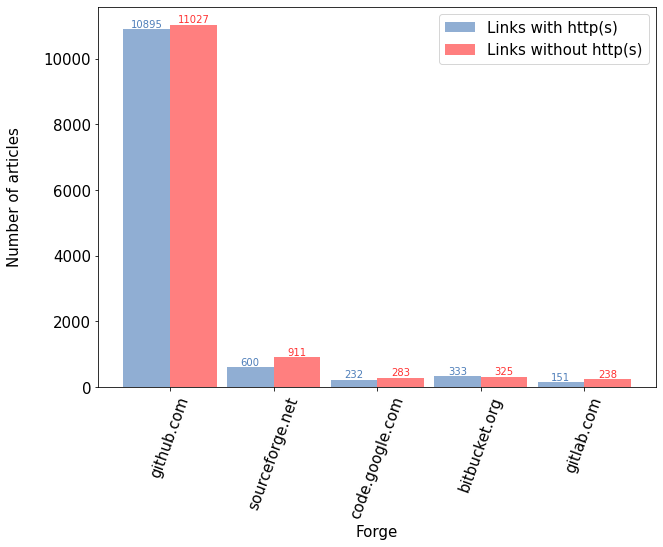

In [38]:
fig, ax = plt.subplots(figsize=(10, 7))

forges = list(forges_http.keys())
values_http = list(forges_http.values())
values_no_http = list(forges_no_http.values())

bar_width = 0.45
x_pos = np.arange(len(forges)) 

ax.bar(x_pos - bar_width/2, values_http, color='#225ea8', alpha = 0.5, width=bar_width)
ax.bar(x_pos + bar_width/2, values_no_http, color='red', alpha = 0.5, width=bar_width)


ax.set_xlabel('Forge', fontsize=15, fontfamily='sans-serif')
ax.set_ylabel('Number of articles\n', fontsize=15, fontfamily='sans-serif')
#ax.set_title('Publications per year', fontsize=15, fontfamily='sans-serif')

# adding numbers for each point (if needed)

for i in range(len(forges)):
    ax.text(i-bar_width/2, values_http[i], str(values_http[i]), 
            ha='center', va='bottom', fontsize=10, color='#225ea8', alpha = 0.8)
    ax.text(i+bar_width/2, values_no_http[i], str(values_no_http[i]), 
            ha='center', va='bottom', fontsize=10, color='red', alpha = 0.8)


ax.legend([f"Links with http(s)", 
           f"Links without http(s)"], fontsize=15)

ax.set_xticks(x_pos)
ax.set_xticklabels(forges, fontsize=14, rotation=70)
ax.tick_params(axis='y', labelsize=15) 
ax.tick_params(axis='x', labelsize=15) 

#plt.savefig("../data/images/stat_swh.png")
plt.show()

In [36]:
dict(sorted(links_stat_lower.items(), key=lambda x: x[1], reverse=True))

{'clinicaltrials.gov': 14670,
 'github.com': 9257,
 'doi.org': 6072,
 'links.lww.com': 2339,
 'dx.doi.org': 2028,
 'crd.york.ac.uk': 1947,
 'elsevier.com': 1533,
 'chictr.org.cn': 1255,
 'webcitation.org': 1232,
 'onlinelibrary.wiley.com': 1063,
 'osf.io': 863,
 'bit.ly': 850,
 'anzctr.org.au': 811,
 'youtu.be': 796,
 'ncbi.nlm.nih.gov': 736,
 'isrctn.com': 643,
 'diagnosticpathology.diagnomx.eu': 639,
 'sourceforge.net': 599,
 'trialregister.nl': 552,
 'cran.r-project.org': 534,
 'bioconductor.org': 470,
 'controlled-trials.com': 441,
 'ow.ly': 381,
 'umin.ac.jp': 360,
 '': 329,
 'irct.ir': 309,
 'ebi.ac.uk': 304,
 'bitbucket.org': 302,
 'drks.de': 299,
 'biomedcentral.com': 270,
 'tinyurl.com': 265,
 'europeanreview.org': 260,
 'cancerres.aacrjournals.org': 252,
 'cdc.gov': 235,
 'code.google.com': 232,
 'upload.umin.ac.jp': 207,
 'sites.google.com': 189,
 'proteomecentral.proteomexchange.org': 174,
 'rimed.org': 172,
 'clinicaltrialsregister.eu': 172,
 'cris.nih.go.kr': 170,
 'sprin

In [34]:
df = pd.read_csv('../data/articles.tsv', sep='\t')
abstracts = df['Abstract'].to_list()

with_http = 0
without_http = 0
links_stat = {}

for abstract in abstracts:
    if abstract != None:

        if linkify.test(str(abstract)):
            for match in linkify.match(str(abstract)):
                link = match.raw
                if link.startswith('http://github') or link.startswith('https://github'):
                    with_http += 1
                elif link.startswith('github') :
                    without_http += 1
                try:
                    key = link.split('/')[2]
                except:
                    try:
                        key = link.split('/')[0]
                    except:
                        key = link
                if key in links_stat:
                    links_stat[key] += 1
                else:
                    links_stat[key] = 1

In [35]:
with_http, without_http 

(10840, 329)